# Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from math import pi
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors

In [3]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

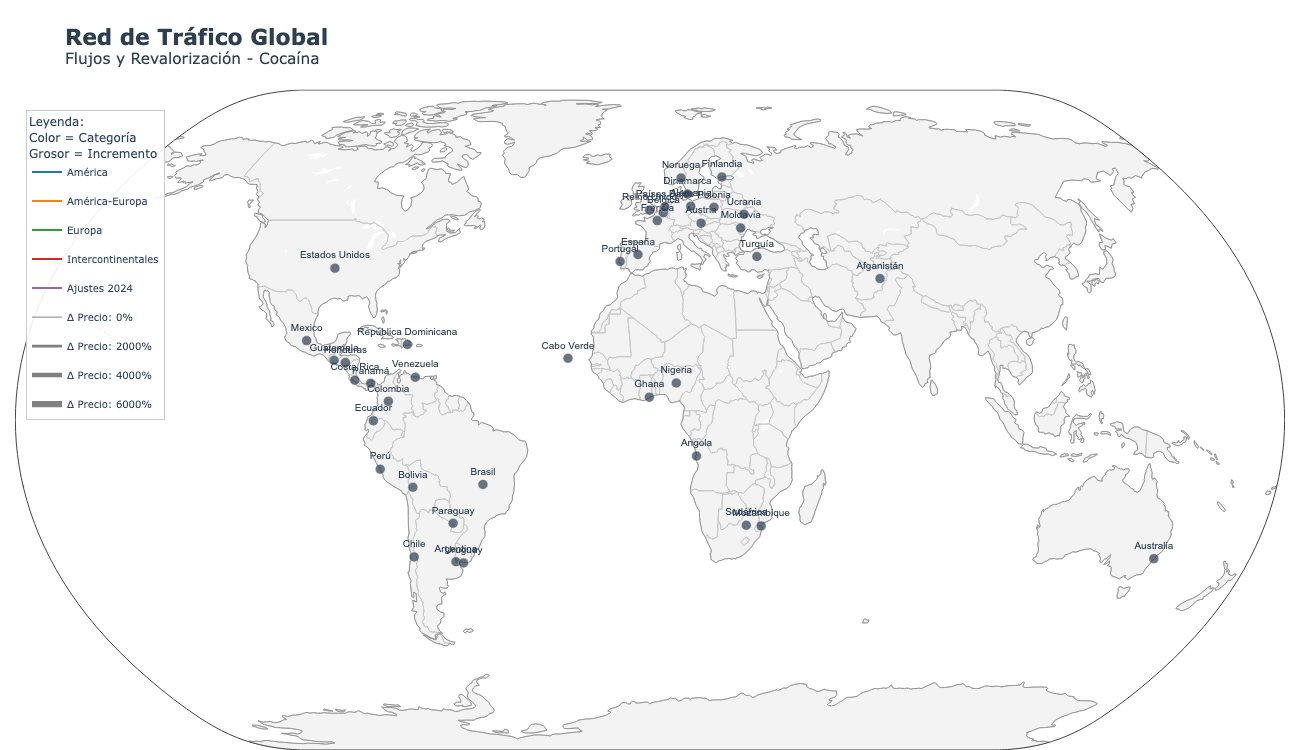

In [6]:
coordenadas_paises = {
    'Afganistán': (69.2075, 34.5553),        # Kabul
    'Alemania': (13.4049, 52.5200),          # Berlín
    'Angola': (13.2316, -8.8159),            # Luanda
    'Argentina': (-58.3816, -34.6037),       # Buenos Aires
    'Australia': (151.2093, -33.8688),       # Sídney
    'Austria': (16.3738, 48.2082),           # Viena
    'Bélgica': (4.3517, 50.8503),            # Bruselas
    'Bolivia': (-68.1193, -16.4897),         # La Paz
    'Brasil': (-47.9297, -15.7801),          # Brasilia
    'Cabo Verde': (-23.5133, 15.1201),       # Praia
    'Chile': (-70.6693, -33.4489),           # Santiago
    'Colombia': (-74.2973, 4.5709),          # Bogotá
    'Costa Rica': (-84.0907, 9.7489),        # San José
    'Dinamarca': (12.5683, 55.6761),         # Copenhague
    'Ecuador': (-78.4678, -0.1807),          # Quito
    'España': (-3.7038, 40.4168),            # Madrid
    'Estados Unidos': (-95.7129, 37.0902),   # Centro geográfico
    'Finlandia': (24.9384, 60.1699),         # Helsinki
    'Francia': (2.3522, 48.8566),            # París
    'Ghana': (-0.1866, 5.6037),              # Acra
    'Guatemala': (-90.5167, 14.6349),        # Ciudad de Guatemala
    'Honduras': (-87.2042, 14.0810),         # Tegucigalpa
    'Mexico': (-99.1332, 19.4326),           # Ciudad de México
    'Moldavia': (28.8614, 47.0105),          # Chisináu
    'Mozambique': (32.5732, -25.8913),       # Maputo
    'Nigeria': (7.4893, 9.0579),             # Abuya
    'Noruega': (10.7522, 59.9139),           # Oslo
    'Países Bajos': (4.8952, 52.3676),       # Ámsterdam
    'Panamá': (-79.5167, 8.9943),            # Ciudad de Panamá
    'Paraguay': (-57.5759, -25.2637),        # Asunción
    'Perú': (-77.0428, -12.0464),            # Lima
    'Polonia': (21.0175, 52.2370),           # Varsovia
    'Portugal': (-9.1393, 38.7223),          # Lisboa
    'Reino Unido': (-0.1276, 51.5074),       # Londres
    'República Dominicana': (-69.9312, 18.4861), # Santo Domingo
    'Sudáfrica': (28.1871, -25.7313),        # Pretoria
    'Turquía': (32.8597, 39.9334),           # Ankara
    'Ucrania': (30.5234, 50.4501),           # Kiev
    'Uruguay': (-56.1645, -34.9011),         # Montevideo
    'Venezuela': (-66.9036, 10.4806)         # Caracas
}

# Rutas de tráfico con sus ponderaciones (porcentaje de incremento)
rutas_trafico = [
    # Flujo de abastecimiento a Estados Unidos:
    ('Colombia', 'Costa Rica', 500.81),     # Primer tramo: Costa Rica como nodo inicial
    ('Colombia', 'Mexico', 739.60),           # Flujo directo a través de México
    ('Mexico', 'Estados Unidos', 198.97),     # Último tramo hacia EE. UU.

    # Flujo de abastecimiento a Europa:
    ('Ecuador', 'Alemania', 2272.82),         # Desde Ecuador a Alemania
    ('Brasil', 'Alemania', 1774.37),          # Desde Brasil a Alemania
    ('Brasil', 'España', 1517.49),            # Desde Brasil a España
    ('Argentina', 'Alemania', 800.81),         # Desde Argentina a Alemania
    ('Argentina', 'España', 677.35),           # Desde Argentina a España
    ('Paraguay', 'Alemania', 555.59),          # Desde Paraguay a Alemania
    ('Uruguay', 'Alemania', 519.31),           # Desde Uruguay a Alemania
    ('Ecuador', 'España', 1947.63),            # Desde Ecuador a España
    ('Ecuador', 'Países Bajos', 1906.66),       # Desde Ecuador a Países Bajos
    ('Brasil', 'Países Bajos', 1485.13),        # Desde Brasil a Países Bajos
    ('Brasil', 'Bélgica', 1339.10),           # Desde Brasil a Bélgica
    ('Ecuador', 'Bélgica', 1721.80),           # Desde Ecuador a Bélgica
    ('Ecuador', 'Portugal', 1472.06),          # Desde Ecuador a Portugal
    ('Brasil', 'Portugal', 1141.82),          # Desde Brasil a Portugal

    # Redistribución interna en Europa:
    ('España', 'Finlandia', 121.47),           # De España a Finlandia
    ('España', 'Moldavia', 66.47),             # De España a Moldavia
    ('Portugal', 'Finlandia', 188.46),         # De Portugal a Finlandia
    ('Portugal', 'Moldavia', 116.83),          # De Portugal a Moldavia
    ('Alemania', 'Austria', 20.04),            # De Alemania a Austria
    ('Alemania', 'Moldavia', 43.66),           # De Alemania a Moldavia

    # Rutas Intercontinentales:
    ('Colombia', 'Nigeria', 2500.0),          # Desde Colombia a Nigeria
    ('Nigeria', 'España', 600.0),             # Desde Nigeria a España
    ('Mexico', 'Australia', 669.9),           # Desde México a Australia
    ('Perú', 'Sudáfrica', 1800.0),            # Desde Perú a Sudáfrica
    ('Brasil', 'Angola', 890.0),              # Desde Brasil a Angola
    ('Venezuela', 'Turquía', 1500.0),         # Desde Venezuela a Turquía
    ('Paraguay', 'Mozambique', 2100.0),       # Desde Paraguay a Mozambique

    # Ajustes críticos (UNODC 2024):
    ('Panamá', 'Ghana', 1100.0),              # Nuevo corredor atlántico
    ('Cabo Verde', 'Portugal', 750.0),        # Plataforma de reexportación
    ('Polonia', 'Ucrania', 200.0),            # Conflictos y mercados grises
    ('Turquía', 'Alemania', 180.0)            # Redes balcánicas
]

# Crear grafo e incorporar nodos y aristas
G = nx.DiGraph()
for pais, coords in coordenadas_paises.items():
    G.add_node(pais, pos=coords)
for ruta in rutas_trafico:
    G.add_edge(ruta[0], ruta[1], weight=ruta[2])

# Parámetros para el grosor de línea
MIN_LINE_WIDTH = 1
MAX_LINE_WIDTH = 8
BASE_OPACITY = 0.7

def calcular_grosor(peso):
    return MIN_LINE_WIDTH + (peso/8000) * (MAX_LINE_WIDTH - MIN_LINE_WIDTH)

# Crear figura de Plotly
fig = go.Figure()

# Agregar nodos con tooltips
node_connections = {pais: [] for pais in coordenadas_paises}
for u, v, data in G.edges(data=True):
    node_connections[u].append(f"→ {v} ({data['weight']}%)")
    node_connections[v].append(f"← {u} ({data['weight']}%)")

for node, coords in coordenadas_paises.items():
    connections = "<br>".join(node_connections[node])
    fig.add_trace(go.Scattergeo(
        lon=[coords[0]], lat=[coords[1]], text=node,
        mode='markers+text',
        marker=dict(size=10, color='#2c3e50', opacity=0.7, line=dict(width=0.5, color='white')),
        textfont=dict(color='#2c3e50', size=10, family='Arial'),
        textposition='top center',
        hoverinfo="text",
        hovertext=f"<b>{node}</b><br><br>Conexiones:<br>{connections}",
        showlegend=False
    ))

# Edge categories ajustadas (se omiten rutas con Francia, ya que no es nodo clave)
edge_categories = {
    'América': {
        'color': '#1f77b4',
        'rutas': [
            ('Colombia', 'Costa Rica'),      # 500.81%
            ('Colombia', 'Mexico'),           # 739.60%
            ('Mexico', 'Estados Unidos')      # 198.97%
        ]
    },
    'América-Europa': {
        'color': '#ff7f0e',
        'rutas': [
            ('Ecuador', 'Alemania'),          # 2272.82%
            ('Brasil', 'Alemania'),           # 1774.37%
            ('Brasil', 'España'),             # 1517.49%
            ('Argentina', 'Alemania'),        # 800.81%
            ('Argentina', 'España'),          # 677.35%
            ('Paraguay', 'Alemania'),         # 555.59%
            ('Uruguay', 'Alemania'),          # 519.31%
            ('Ecuador', 'España'),            # 1947.63%
            ('Ecuador', 'Países Bajos'),      # 1906.66%
            ('Brasil', 'Países Bajos'),       # 1485.13%
            ('Brasil', 'Bélgica'),            # 1339.10%
            ('Ecuador', 'Bélgica'),           # 1721.80%
            ('Ecuador', 'Portugal'),          # 1472.06%
            ('Brasil', 'Portugal')            # 1141.82%
        ]
    },
    'Europa': {
        'color': '#2ca02c',
        'rutas': [
            ('España', 'Finlandia'),          # 121.47%
            ('España', 'Moldavia'),           # 66.47%
            ('Portugal', 'Finlandia'),        # 188.46%
            ('Portugal', 'Moldavia'),         # 116.83%
            ('Alemania', 'Austria'),          # 20.04%
            ('Alemania', 'Moldavia')          # 43.66%
        ]
    },
    'Intercontinentales': {
        'color': '#d62728',
        'rutas': [
            ('Colombia', 'Nigeria'),         # 2500.0%
            ('Nigeria', 'España'),            # 600.0%
            ('Mexico', 'Australia'),          # 669.9%
            ('Perú', 'Sudáfrica'),            # 1800.0%
            ('Brasil', 'Angola'),             # 890.0%
            ('Venezuela', 'Turquía'),         # 1500.0%
            ('Paraguay', 'Mozambique')        # 2100.0%
        ]
    },
    'Ajustes 2024': {
        'color': '#9467bd',
        'rutas': [
            ('Panamá', 'Ghana'),              # 1100.0%
            ('Cabo Verde', 'Portugal'),       # 750.0%
            ('Polonia', 'Ucrania'),           # 200.0%
            ('Turquía', 'Alemania')           # 180.0%
        ]
    }
}

# Agregar todas las rutas según las categorías
for category, config in edge_categories.items():
    for ruta in config['rutas']:
        if G.has_edge(*ruta):
            u, v = ruta
            x0, y0 = G.nodes[u]['pos']
            x1, y1 = G.nodes[v]['pos']
            peso = G.edges[ruta]['weight']

            fig.add_trace(go.Scattergeo(
                lon=[x0, x1],
                lat=[y0, y1],
                mode='lines',
                line=dict(
                    width=calcular_grosor(peso),
                    color=config['color']
                ),
                opacity=BASE_OPACITY,
                hoverinfo="text",
                hovertext=f"{u} → {v}<br>Δ Precio: {peso}%",
                legendgroup=category,
                showlegend=False,
                visible='legendonly'
            ))

    # Agregar traza para la leyenda interactiva de cada categoría
    fig.add_trace(go.Scattergeo(
        lon=[None],
        lat=[None],
        mode='lines',
        line=dict(width=2, color=config['color']),
        name=category,
        legendgroup=category,
        showlegend=True
    ))

# Leyenda para el grosor (ejemplo)
fig.add_trace(go.Scattergeo(
    lon=[None],
    lat=[None],
    mode='lines',
    line=dict(width=1, color='gray'),
    name='Δ Precio: 0%',
    showlegend=True
))
for peso in [2000, 4000, 6000]:
    fig.add_trace(go.Scattergeo(
        lon=[None],
        lat=[None],
        mode='lines',
        line=dict(width=calcular_grosor(peso), color='gray'),
        name=f'Δ Precio: {peso}%',
        showlegend=True
    ))

# Configuración final del layout
fig.update_layout(
    title=dict(
        text="<b>Red de Tráfico Global</b><br><sup>Flujos y Revalorización - Cocaína</sup>",
        x=0.05,
        font=dict(size=22, color='#2c3e50')
    ),
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(200, 200, 200)',
        coastlinecolor='rgb(150, 150, 150)',
        showcountries=True
    ),
    legend=dict(
        title='Leyenda:<br>Color = Categoría<br>Grosor = Incremento',
        yanchor="top",
        y=0.97,
        xanchor="left",
        x=0.02,
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='#CCCCCC',
        borderwidth=1,
        font=dict(size=10)
    ),
    margin=dict(l=0, r=0, t=90, b=0),
    height=750,
    width=1300,
    template='plotly_white'
)

fig.show()

In [7]:
fig.write_html("red_trafico.html")